# GitHub Stats for FLORIS
This notebook is used to connect to the GitHub stats database for the FLORIS repo to extract and visualize data



In [1]:
# add path above this notebook
import sys
sys.path.append("..") 
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import dateutil

In [2]:
# import database
import database as dbc

In [3]:
# connect to the database

db = dbc.Database()

/Users/pfleming/anaconda3/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [4]:
# retrieve data in the following range
# timestamps in format YYYY-MM-DD
from_date = '2018-01-01'
to_date = datetime.datetime.today().strftime('%Y-%m-%d') # set to today


In [5]:
print("FROM DATE: " + from_date)
print("TO DATE: " + to_date)

FROM DATE: 2018-01-01
TO DATE: 2019-03-27


In [7]:
results_wisdem = db.getResults(from_date, to_date, repo_code='wisdem_floris')
results_nrel_floris = db.getResults(from_date, to_date, repo_code='nrel_floris')
results_wfc_tools = db.getResults(from_date, to_date, repo_code='wfc_tools')

In [12]:
# Mix together
df_1 = pd.DataFrame(results_wisdem)
df_1['repo'] = 'floris_wisdem'
df_2 = pd.DataFrame(results_nrel_floris)
df_2['repo'] = 'floris_nrel'
df_3 = pd.DataFrame(results_wfc_tools)
df_3['repo'] = 'wfc_tools'

df = df_1.append(df_2).append(df_3)
df['timestamp'] = pd.to_datetime(df.timestamp)

In [20]:
# Melt the data for dope plotting
df_melt = pd.melt(df,id_vars=['repo','timestamp'])
df_melt = df_melt.sort_values(['timestamp'])
df_melt.head()

,repo,timestamp,variable,value
0,floris_wisdem,2019-01-05,clones_total,NaN
267,floris_wisdem,2019-01-05,views_uniques,2
178,floris_wisdem,2019-01-05,views_total,8
89,floris_wisdem,2019-01-05,clones_uniques,NaN
1,floris_wisdem,2019-01-07,clones_total,1


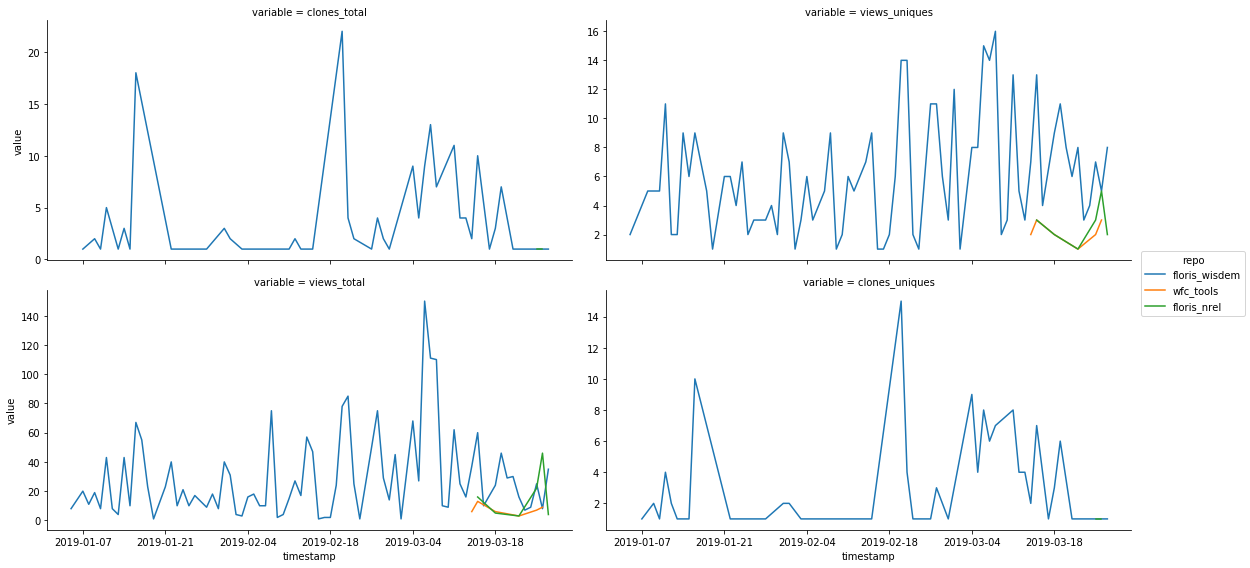

In [29]:
# Dope plots
g = sns.FacetGrid(df_melt,col='variable',col_wrap=2,hue='repo',size=4,sharey=False,aspect=2)
g.map(plt.plot,'timestamp','value')
g.add_legend()

In [52]:
# Reformulate as rolling
# Mix together
df_1 = pd.DataFrame(results_wisdem).fillna(0).sort_values(['timestamp'])
df_1 = df_1.set_index('timestamp').cumsum().reset_index()
df_1['repo'] = 'floris_wisdem'
df_2 = pd.DataFrame(results_nrel_floris).fillna(0).sort_values(['timestamp'])
df_2 = df_2.set_index('timestamp').cumsum().reset_index()
df_2['repo'] = 'floris_nrel'
df_3 = pd.DataFrame(results_wfc_tools).fillna(0).sort_values(['timestamp'])
df_3 = df_3.set_index('timestamp').cumsum().reset_index()
df_3['repo'] = 'wfc_tools'

df = df_1.append(df_2).append(df_3)
df['timestamp'] = pd.to_datetime(df.timestamp)

In [54]:
# Melt the data for dope plotting
df_melt = pd.melt(df,id_vars=['repo','timestamp'])
df_melt = df_melt.sort_values(['timestamp'])

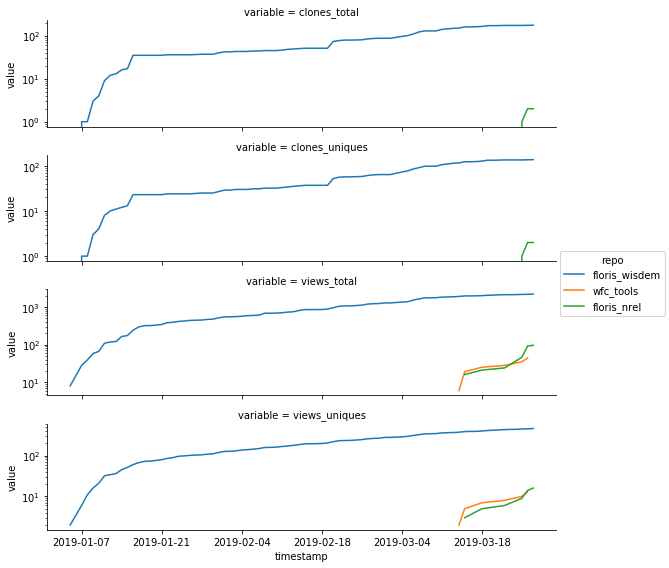

In [61]:
# Dope plots
g = sns.FacetGrid(df_melt,row='variable',hue='repo',size=2,sharey=False,aspect=4)
g.map(plt.semilogy,'timestamp','value')
g.add_legend()

## TOTAL COUNTS

In [10]:
# Get total counts for all time recorded
totals = db.getTotals()
print(totals)

GETTING TOTAL UNIQUE VIEWS AND CLONES
   total_unique_clones  total_unique_views  from_date    to_date
0                   39                 222 2019-01-05 2019-02-20
